In [10]:
from qiskit import*
from qiskit.tools.visualization import*
from numpy import*
from matplotlib.pyplot import*
#from cmath import*

In [11]:
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
qc=QuantumCircuit(qr,cr)

In [13]:
backend=BasicAer.get_backend('qasm_simulator')
p=[]
q=[]
n=2
g=1
om=2*g*sqrt(n+1)#rabi frequency
d=0.2*pi#detuning frequency
t=arange(0,2,0.01)

for i in t:
    th=om*i*(n+1)
    #initialization
    qc.x(qr[0])
    qc.u(0,th,0,qr[0])#phase shift gate
    qc.x(.qr[0])
    
    qc.rz(d*i,qr[0])
    qc.rx(om*i,qr[0])
    qc.measure(qr[0],cr[0])
    counts=execute(qc,backend,shots=1024).result().get_counts()
    if '0' in counts:
            p.append(counts['0'])
            q.append(1024-counts['0'])
    else:
        p.append(0)
        q.append(1024)
    qc.reset(qr)



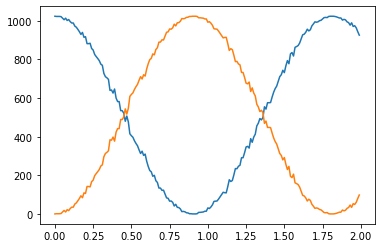

In [4]:
plot(t,p)
plot(t,q)

In [14]:
p=[p/1024 for p in p]
q=[q/1024 for q in q]

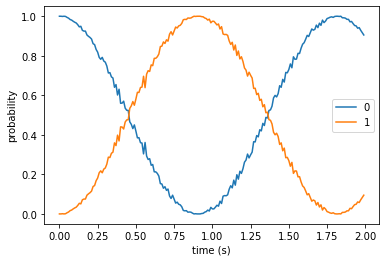

In [16]:
plot(t,p,label='0')
plot(t,q,label='1')
xlabel('time (s)')
ylabel('probability')
legend()

In [20]:
IBMQ.load_account()
provider=IBMQ.get_provider(hub='ibm-q')
backend=provider.get_backend('ibmq_armonk')

ibmqfactory.load_account:WARNING:2021-02-25 22:40:20,209: Credentials are already in use. The existing account in the session will be replaced.


In [21]:
r=[]
s=[]
n=2
g=1
om=2*g*sqrt(n+1)#rabi frequency
d=0.2*pi#detuning frequency
t=arange(0,2,0.01)

for i in t:
    th=om*i*(n+1)
    #initialization
    qc.x(qr[0])
    qc.u(0,th,0,qr[0])#phase shift gate
    qc.x(qr[0])
    
    qc.rz(d*i,qr[0])
    qc.rx(om*i,qr[0])
    qc.measure(qr[0],cr[0])
    job=execute(qc,backend,shots=1024)
    results=job.result()
    counts=results.get_counts()
    
    if '0' in counts:
            r.append(counts['0'])
            s.append(1024-counts['0'])
    else:
        r.append(0)
        s.append(1024)
    qc.reset(qr)


IBMQJobFailureError: "Unable to retrieve result for job 6037da757346524ba958f892. Job has failed: Instruction {'name': 'reset', 'qubits': [0]} is not supported. Error code: 7001."

In [ ]:
r=[r/1024 for r in r]
s=[s/1024 for s in s]

In [ ]:
plot(t,r,label='0')
plot(t,s,label='1')
xlabel('time (s)')
ylabel('probability')
legend()